# Uso del algoritmo K-Means
### Elección del parámetro k: Métodos del codo y silhouette

<!-- ![a](https://sigmamagic.com/blogs/images/kmeans-2.png) -->
<img src="https://sigmamagic.com/blogs/images/kmeans-2.png" width="33%" />

El algoritmo K-Means es un método de clustering que consiste en subdividir el conjunto de datos en un número predefinido de K clústers, llamaremos al centro de cada cluster el *centroide*. En el siguiente tutorial aprenderemos el razonamiento detrás de su funcionamiento y aprenderemos a usar su implementación en la librería ``sklearn``, además de aprender sobre los métodos del codo y silhouette para determinar su parámetro K

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Funciones útiles para trabajar datos
from sklearn.datasets import make_blobs

# Importamos el algoritmo de K-Means
from sklearn.cluster import KMeans

In [ ]:
random_state = 6

# Generamos un dataset de datos aleatorios (sin etiquetas) usando sklearn
X, _ = make_blobs(n_samples = 1000, centers = 4, n_features = 2, random_state = random_state)

# Graficamos los datos
plt.scatter(X[:, 0], X[:, 1])

En este caso, conocemos el número de clústers y podemos distinguirlos fácilmente de manera visual. Por tanto, entrenar un clasificador que utilize K-Means resulta una tarea algo trivial, dado que conocemos el valor de K a utilizar

In [ ]:
num_clusters = 4

# Ejecutamos el algoritmo de K-Means sobre los datos para obtener un clasificador que nos permita estimar sobre ellos
clasificador = KMeans(n_clusters = num_clusters, random_state = random_state).fit(X)

In [ ]:
# Graficamos los resultados
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

# Graficamos los datos y los centroides encontrados
ax1.scatter(X[:, 0], X[:, 1])
ax1.scatter(clasificador.cluster_centers_[:, 0], clasificador.cluster_centers_[:, 1])
ax1.set_title("Centroides encontrados para cada clúster")

# Graficamos los datos y a que clúster fueron estimados
y_pred = clasificador.predict(X)
ax2.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 4))
ax2.set_title("Datos etiquetados según el clúster estimado")

plt.show()

Ahora bien, cuando comenzamos a trabajar con datos no tan separados entre sí y que además se encuentran en múltiples dimensiones, la tarea de encontrar el valor K deja de ser tan fácil y debemos recurrir a métodos basados en métricas como lo son el método del codo y de silhouete.

In [ ]:
random_state = 6

# Generamos un dataset de datos aleatorios (sin etiquetas) usando sklearn
X, _ = make_blobs(n_samples = 3000, centers = 7, n_features = 3, cluster_std = 1.3, random_state = random_state)

# Graficamos los datos
fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

## Método del codo:

Este método utiliza una métrica llamada Within Cluster Sum of Square (WCSS) para determinar qué valor de K utilizar.

$$WCSS = \sum_{i \in n} (X_i - Y_i)^2$$

Con Y_i el centroide asociado al dato X_i. En otras palabras, calcula la sumatoria de distancias al centroide más cercano para todos los datos.

Esta sumatoria ya está precalculada en la implementación de K-Means de sklearn bajo el atributo de `.interia_`

Como su nombre lo indica, el método del codo busca encontrar el vértice en que la curva de WCSS vs parámetro K tiene un punto de inflexión, considerando este valor como el ideal para el clustering.

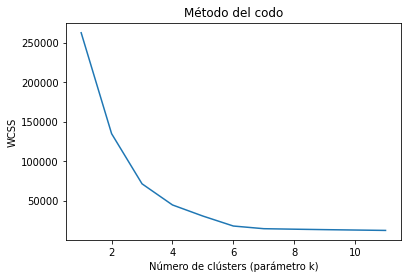

In [9]:
# Definimos un rango de valores K para probar en el clustering:
k_range = 12

# Creamos una lista para almacenar los valores de WCSS para cada valor de K
wcss = []

for i in range(1, k_range):
    clasificador = KMeans(n_clusters = i, random_state = random_state).fit(X)
    wcss.append(clasificador.inertia_)

plt.plot(range(1, k_range), wcss)
plt.title("Método del codo")
plt.xlabel("Número de clústers (parámetro k)")
plt.ylabel("WCSS")
plt.show()

Notamos que la curva deja de decrecer bruscamente entre k = 6 y k = 7, por tanto, el valor de k a escoger se encontrará en ese rango.

Ahora visualizaremos los clústers con k = 6 y k = 7:

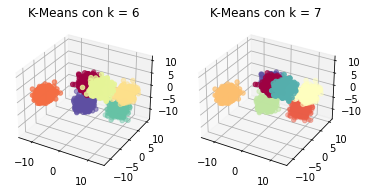

In [10]:
# Graficamos los datos
fig = plt.figure()
fig.set_size_inches(6, 12)

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
clasificador = KMeans(n_clusters = 6, random_state = random_state).fit(X)
y_pred = clasificador.predict(X)
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 6))
ax1.set_title("K-Means con k = 6")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
clasificador = KMeans(n_clusters = 7, random_state = random_state).fit(X)
y_pred = clasificador.predict(X)
y_pred_codo = y_pred
ax2.scatter(X[:, 0], X[:, 1], X[:, 2], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 7))
ax2.set_title("K-Means con k = 7")

plt.show()

Observar una proyección de los datos suele no ser muy intuitivo, por lo que vamos a proyectarlos en cada plano de coordenadas (para k = 7):

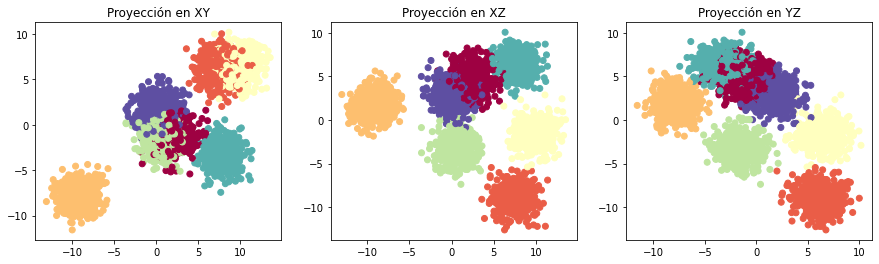

In [11]:
# Graficamos los resultados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 4)

# Graficamos los datos en el plano XY
ax1.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 7))
ax1.set_title("Proyección en XY")

# Graficamos los datos en el plano XZ
ax2.scatter(X[:, 0], X[:, 2], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 7))
ax2.set_title("Proyección en XZ")

# Graficamos los datos en el plano YZ
ax3.scatter(X[:, 1], X[:, 2], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 7))
ax3.set_title("Proyección en YZ")

plt.show()

## Método de silhouette:

Este método utiliza una métrica llamada Silhouette Score para determinar qué valor de K utilizar.

$$SilhouetteScore = \frac{n - m}{max(m, n)}$$

Con `n` la distancia promedio entre un dato y el clúster más cercano que no esta asociado a él y `m` la distancia promedio entre clústers.

Esta métrica se encuentra implementada en `sklearn` bajo el nombre de `silhouette_score`.

En este caso, aquel valor de K que maximiza la métrica será aquel que utilizaremos.

In [12]:
# Importamos la métrica de rendimiento
from sklearn.metrics import silhouette_score

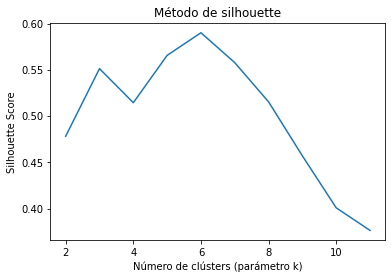

In [13]:
# Definimos un rango de valores K para probar en el clustering:
k_range = 12

# Creamos una lista para almacenar los valores de WCSS para cada valor de K
silhouettes = []

for i in range(2, k_range):
    clasificador = KMeans(n_clusters = i, random_state = random_state).fit(X)
    s_score = silhouette_score(X, clasificador.predict(X))
    silhouettes.append(s_score)

plt.plot(range(2, k_range), silhouettes)
plt.title("Método de silhouette")
plt.xlabel("Número de clústers (parámetro k)")
plt.ylabel("Silhouette Score")
plt.show()

En este caso la métrica nos recomienda un valor de k = 6. Vamos a proyectar como esto se vería en distintos planos:

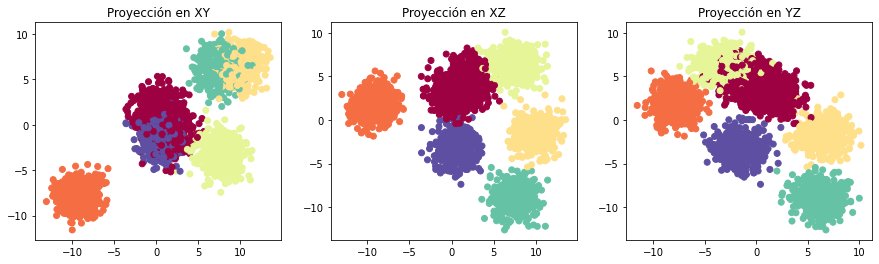

In [14]:
clasificador = KMeans(n_clusters = 6, random_state = random_state).fit(X)
y_pred = clasificador.predict(X)
y_pred_sil = y_pred

# Graficamos los resultados
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 4)

# Graficamos los datos en el plano XY
ax1.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 6))
ax1.set_title("Proyección en XY")

# Graficamos los datos en el plano XZ
ax2.scatter(X[:, 0], X[:, 2], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 6))
ax2.set_title("Proyección en XZ")

# Graficamos los datos en el plano YZ
ax3.scatter(X[:, 1], X[:, 2], c = y_pred, cmap = plt.cm.get_cmap('Spectral', 6))
ax3.set_title("Proyección en YZ")

plt.show()

## Conclusiones:
- El clustering se aplicará generalmente como un primer paso de análisis cuando los datos no poseen etiquetas asociadas.
- Podemos aplicar el algoritmo K-Means para entrenar un clasificador en `sklearn` utilizando su clase `KMeans`.
- El uso de métodos como el del codo y silhouette nos ayudan a generar una intuición sobre qué valor de K utilizar para nuestro algoritmo, su rendimiento depende altamente de la distribución de los datos.